In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import snowflakes

<IPython.core.display.Javascript object>


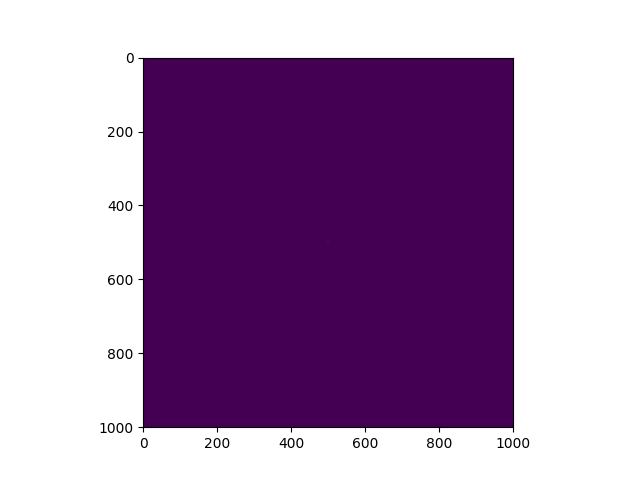

In [4]:
a_0 = np.zeros((1001, 1001), dtype=bool)
a_0[a_0.shape[0] // 2, a_0.shape[1] // 2] = True

plt.figure()
plt.imshow(a_0)

In [5]:
%%time
a, b, c, d = snowflakes.snowflake(
    a_0=a_0,
    alpha=0.4,
    beta=1.6,
    gamma=0.0005,
    theta=0.025,
    kappa=0.005,
    mu=0.015,
    rho=0.635,
    num_steps=10000,
    num_frames=100,
)

CPU times: total: 4h 34min 51s
Wall time: 6min 3s


<IPython.core.display.Javascript object>


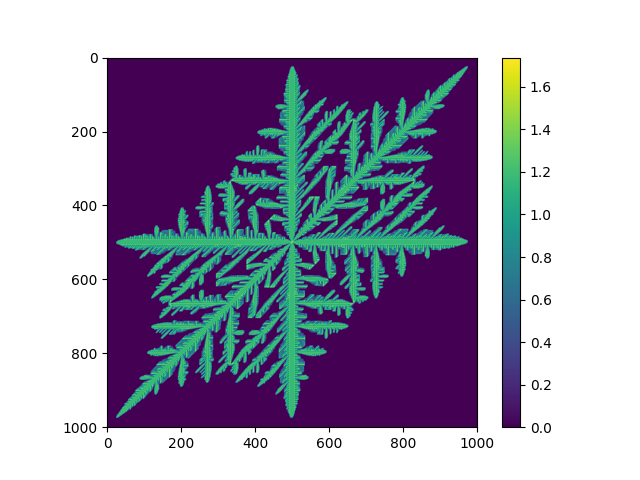

In [6]:
plt.figure()
plt.imshow(c[~0])
plt.colorbar()

In [7]:
%%time
crystal = scipy.ndimage.rotate(c, angle=45, axes=(~1, ~0))
crystal = scipy.ndimage.zoom(crystal, zoom=(1, 1, np.sqrt(3)))

CPU times: total: 1min 42s
Wall time: 1min 42s


<IPython.core.display.Javascript object>


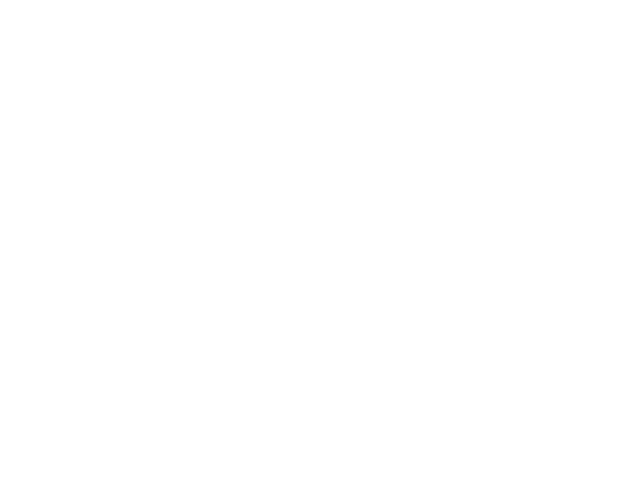

<IPython.core.display.Javascript object>


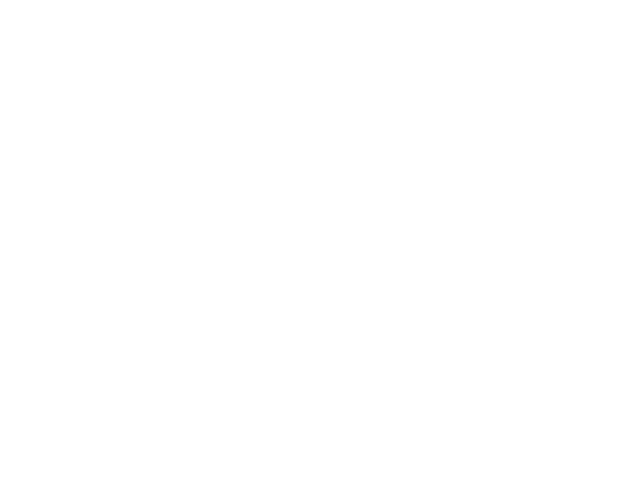

<IPython.core.display.Javascript object>


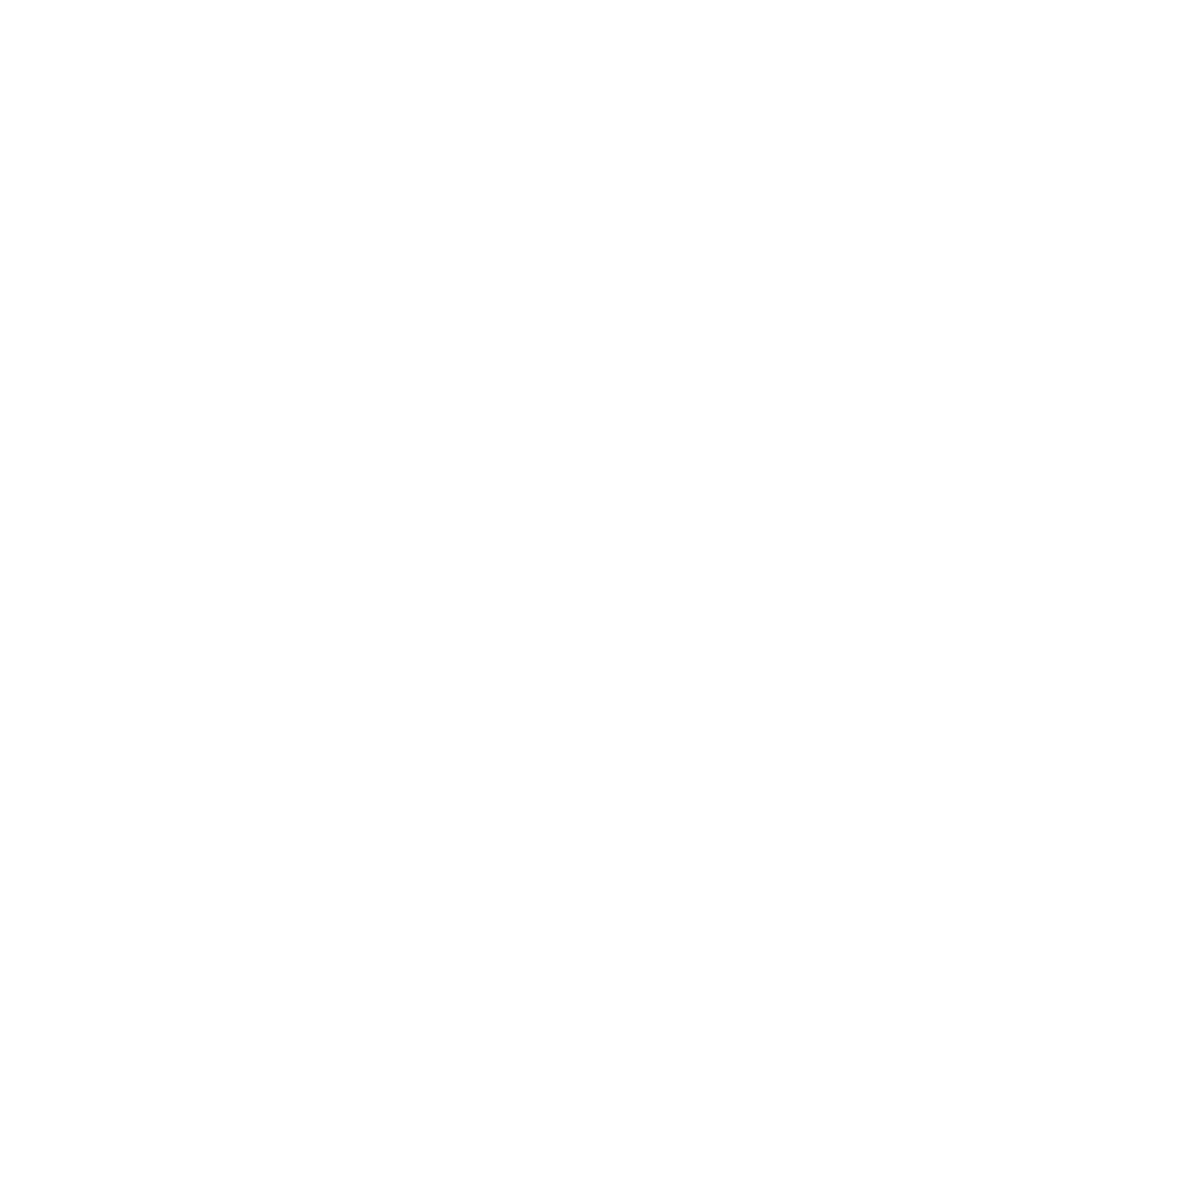

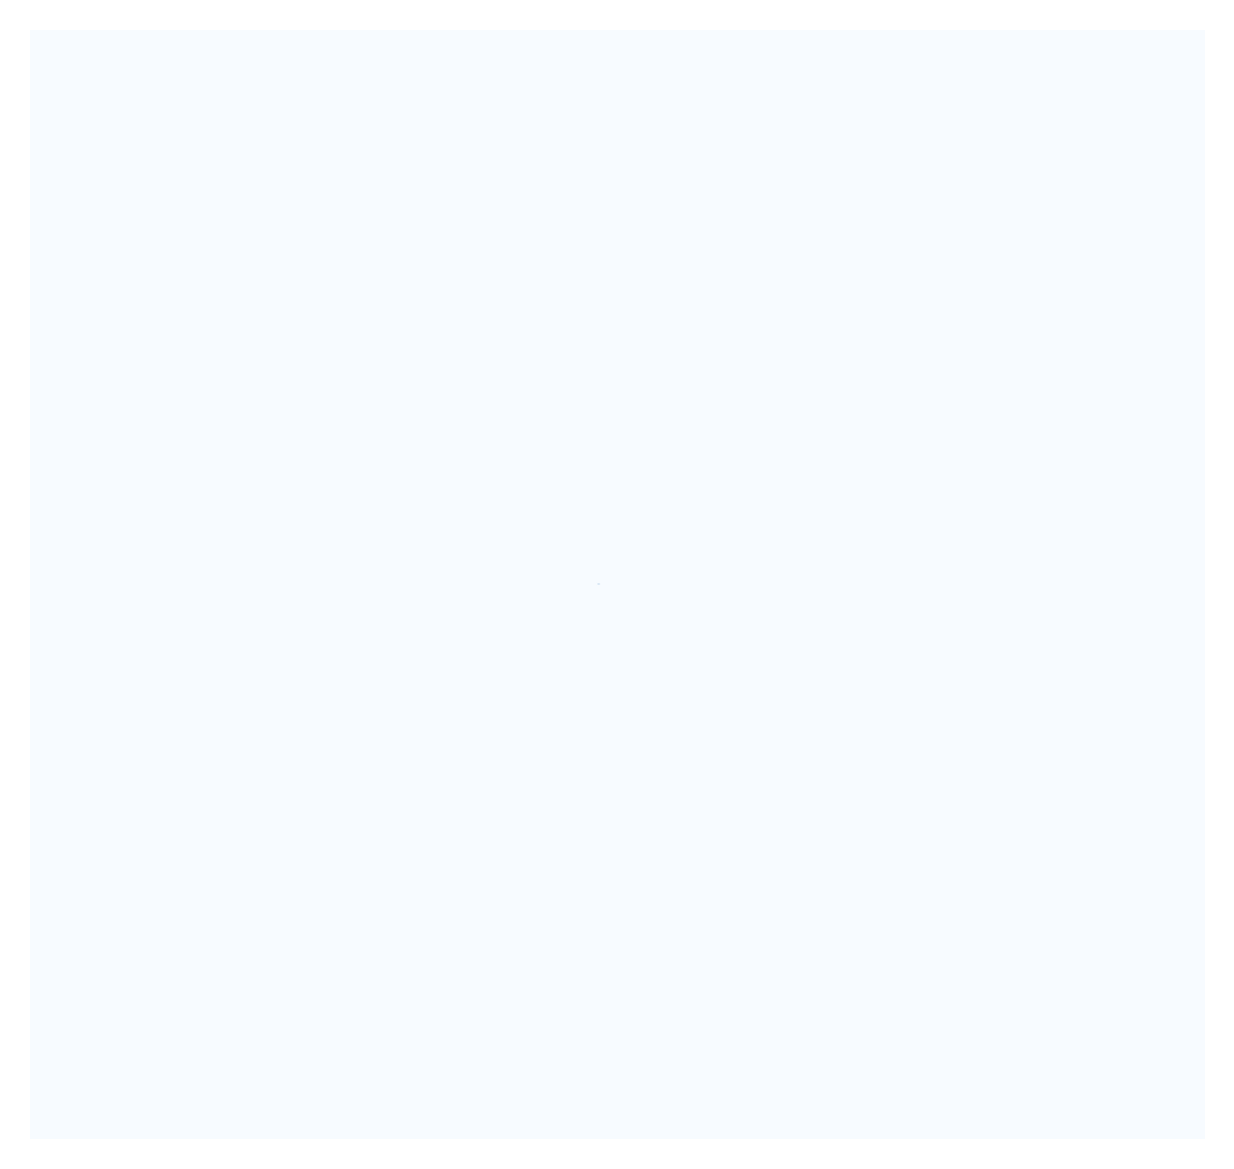

In [11]:
import matplotlib.animation
import IPython.display

fig, ax = plt.subplots(figsize=(4, 4), dpi=300, constrained_layout=True)
img = ax.imshow(
    crystal[0],
    cmap="Blues",
    vmin=0,
    vmax=crystal[~0].max()
)
ax.set_xlim(500, 2000)
ax.set_axis_off()
ax.set_constrained_layout=False

def update(frame: int):
    img.set_data(crystal[frame])
    
ani = matplotlib.animation.FuncAnimation(
    fig=fig, 
    func=update, 
    frames=crystal.shape[0],
)

# ani.save("snowflake.mp4", fps=30)
# ani.save("snowflake.gif", fps=30)

IPython.display.HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>


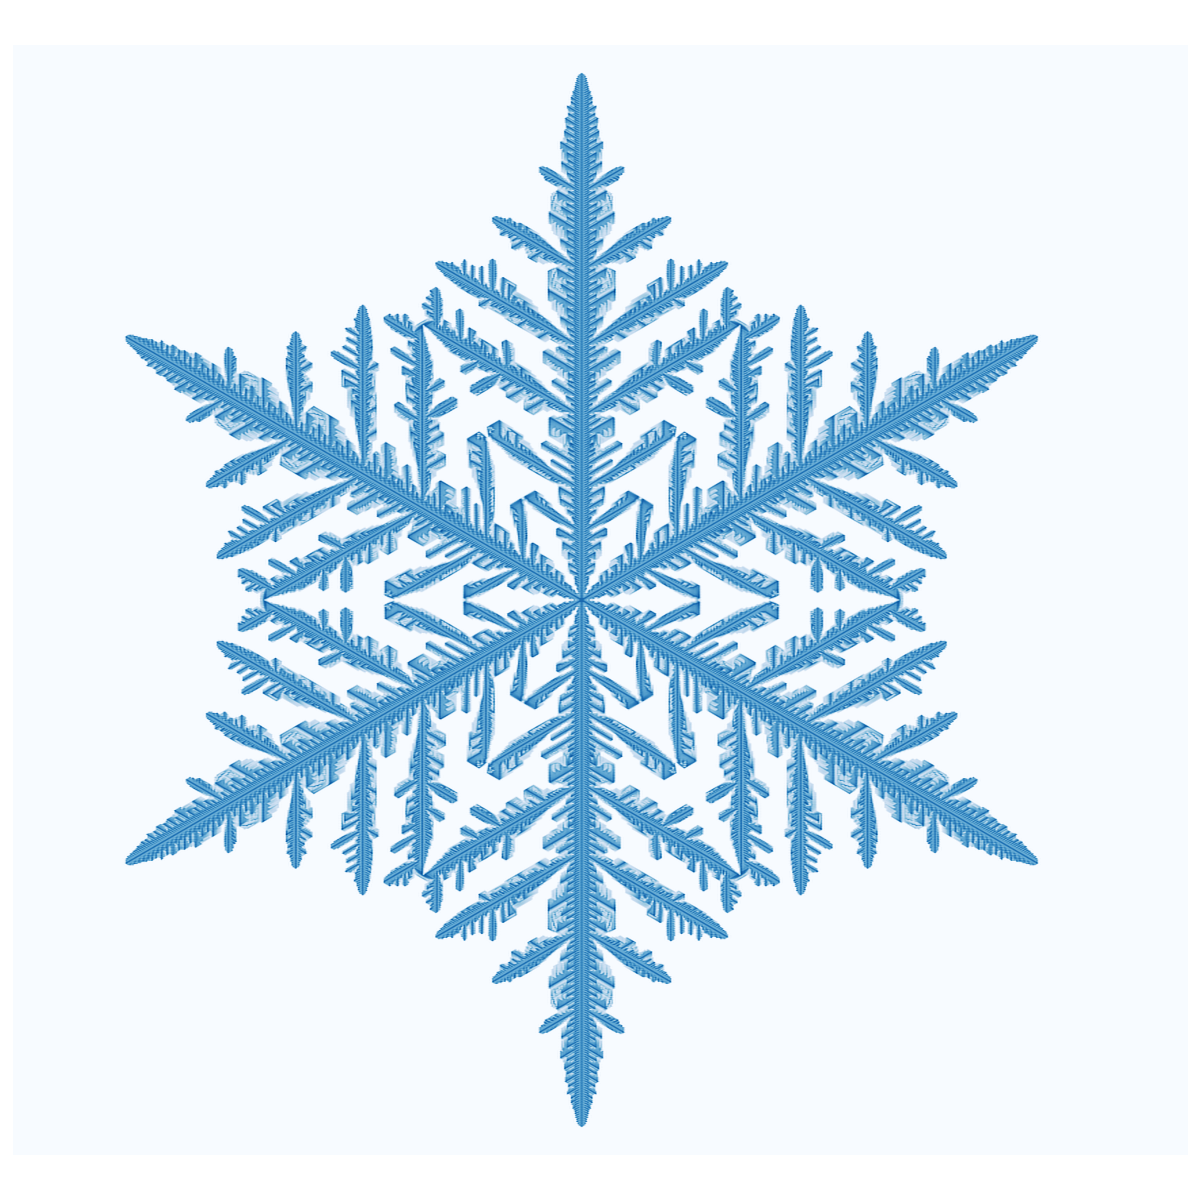

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300, constrained_layout=True)
ax.imshow(
    crystal[~0],
    cmap="Blues",
    vmin=0,
)
ax.set_xlim(500, 2000)
ax.set_axis_off()
fig.savefig("snowflake.png")
